# import 관련

### 기본적인 것!

~~~
import pandas as pd
import numpy as np
~~~

### 시각화 및 한글적용

~~~
import matplotlib.pyplot as plt
import seaborn as sns

# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
#     font_list_mac = fm.OSXInstalledFonts()
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Linux': # 리눅스
    rc( 'font', family='NanumGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    # fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family='NanumGothic' )
else:
    print('알수없는 시스템. 미적용')
~~~

# DataFrame

## 기본적인 데이터 확인
- 칼럼 리스트 가져오기
~~~
df.columns
~~~
- index 리스트 가져오기
~~~
df.index
~~~
- 행 갯수 X 열 갯수 확인
~~~
df.shape
df.shape[0] # 행
df.shape[1] # 열
~~~
- 데이터 일부 확인
~~~
df.head() # 시작에서
df.tail() # 끝에서
df.sample() # 랜덤으로
~~~
- 데이터 타입 확인
~~~
df.dtypes
df.info() # non-null 갯수까지 보여줌
~~~
- 데이터의 기초 통계 확인
~~~
book_rate_2019.describe() # 수치형만
book_rate_2019.describe(include="all") # object형까지 모두
~~~

### csv 읽기
- skiprows, header => 비슷한 역할 (구체적인 구분 X)
- encoding => 왠만하면 euc-kr, utf-8 선에서 나온다.
- 경로 => 상대경로 안먹히면 절대경로로
~~~
book_rate_2019 = pd.read_csv('./data/test.csv', encoding='euc-kr', skiprows=1)
~~~

### csv로 저장
- to_csv => 인코딩해서 저장
- index=Fase  
  => 숫자 인덱싱이라면 False해주어야 함  
  => 전환중에 문자 인덱싱으로 바뀌었다면 False 설정 후  
  save하는 것으로 인덱스 열을 다시 칼럼으로 바꾸고  
  숫자 인덱싱으로 전환 가능

~~~
book_rate_T_2019.to_csv('./book_rate_mid/test.csv', encoding="euc-kr")
~~~

### 칼럼명 변경
- 기존 / 바꿀 칼럼명 두개를 수기로 나열

~~~
dic = {
    "기존 칼럼명":"바꿀 칼럼명",
    "기존 칼럼명":"바꿀 칼럼명",
}
book_rate_2019.rename( columns=dic, inplace=True )
~~~

### 결측치(null) 확인
- isnull => null인 것 True 반환
- sum => True를 1로 인식, 갯수 카운트 역할

~~~
book_rate_2019.isnull().sum()
~~~

### 특정 열에서 원하는 것만 가져오기

~~~
book_rate_2019[book_rate_2019['대분류'] == '연령']
~~~

### 원하는 열만 빼서 dataframe 구성
- iloc의 파라미터
    - 1번째 : 어떤 행을 가져올지  
      => list처럼 -1 인덱스 가능
    - 2번째 : 어떤 열을 가져올지  
      => 특정 열 이름 -> ["a", "b", ...]  
      => 숫자 인덱싱 -> range(2, 5)

~~~
book_rate_age_2019.iloc[:, range(2,len(book_rate_age_2019.columns))]
~~~

### 행 열 뒤집기!
- numpy의 transaction 사용  
  => df.T

~~~
book_rate_age_2019.iloc[:, range(2,len(book_rate_age_2019.columns))].T
~~~

### 열 삭제
- drop => axis=1로 해줘도 된다.

~~~
del df["column name"]
~~~

### 행 삭제
- df의 특정 열 조건에 맞는 행을 삭제시킨다.
- drop
    - index :  
      => 인덱스 리스트로 줘도 됨 -> [1,2,3,10] / 해당하는 인덱스!! 삭제
    - inplace=True  
      => 바로 적용할지 여부

~~~
df.drop(index=df[df["column name"]=="계"].index, inplace=True)
~~~

### 기존 데이터 프레임에 열 추가
- 주의 : 좌변의 데이터프레임과 우변의 리스트 길이가 같아야 한다.
~~~
df['연도'] = list_2019
~~~

### 데이터 프레임 아래로 붙이기 ( 행 추가 )
- 주의 : 칼럼이 같아야 한다!!
- axis=1 로 주면 우로 붙는다. => 찾아보실 것!
- ignore_index=True
    - 인덱스를 새로이 해준다.  
      => 기본적으로 해주는 게 정상적인 동작인 듯


~~~
df_all = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
~~~

# 시각화!

### 바 그래프
- 한 개

~~~
a = book_rate[book_rate.소분류 == "잡지류"]

g = sns.factorplot(x="연도",y="10대",data=a,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("10대 잡지류")

~~~

<hr>

- 여러 개 동시에

~~~
a = book_rate[book_rate.소분류 == "잡지류"]

li = ["10대", "20대", "30대", "40대", "50대", "60세 이상", "65세 이상"]
for i in li:
    g = sns.factorplot(x="연도",y=i,data=a,kind="bar", size = 6 , 
    palette = "muted")
    g.despine(left=True)
    g = g.set_ylabels(i +" 잡지류")
    
# 전체적으로 전연령대에서 감소세
~~~

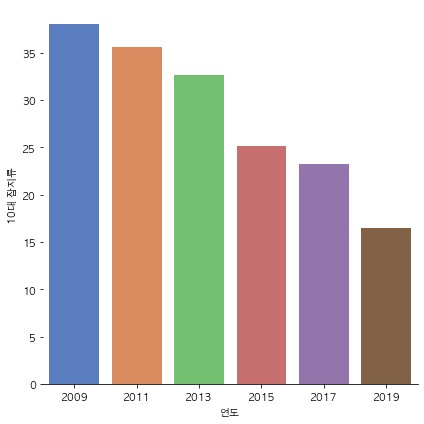